# **WINE QUALITY PREDICTION**

---
A project by Ragha.

### **Details**
---
* Here we will predict the quality of wine and type of the wine on the basis of given features. We use the wine quality dataset available on Kaggle. This dataset has the fundamental features which are responsible for affecting the quality of the wine. By the use of Deep learning models, we will predict the quality and type of the wine.



## **IMPORTING LIBRARIES**

In [287]:
import tensorflow as tf
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense,Input,Normalization
import numpy as np
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix

## **DATA PREPARATION**

In [288]:
drive.mount('/content/drive')
data=pd.read_csv("/content/drive/MyDrive/Data Sets/winequalityN.csv")
df=data.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [289]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [290]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [291]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [292]:
columns=['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']

In [293]:
for i in columns:
    unique_values=pd.unique(data[i])
    value_count=pd.value_counts(data[i])
    print(i,'\n')
    print("Unique Values ")
    print(unique_values)
    print('\n')
    print("Value Count")
    print(value_count)
    print('\n')

type 

Unique Values 
['white' 'red']


Value Count
white    4898
red      1599
Name: type, dtype: int64


fixed acidity 

Unique Values 
[ 7.    6.3   8.1   7.2   6.2   8.6   7.9   6.6   8.3    nan  7.4   6.5
  6.4   6.8   7.6   6.9   8.5   5.8   7.3   6.7   6.    7.1   6.1   7.5
  9.8   5.5   5.9   7.8   5.7   8.2   5.6   5.2   8.4  10.2   7.7   5.3
  5.4   9.1   5.    8.   10.    5.1   9.2   9.    8.8   8.7   4.8  10.3
  9.4   9.6   9.3   8.9   9.7  10.7  14.2   9.9   9.5  11.8   4.6   6.15
  4.5   7.15  6.45  4.2   4.9   4.7   3.8   4.4   3.9  11.2  10.1  11.5
 12.8  11.   11.6  12.   15.   10.8  11.1  12.5  10.9  11.4  10.4  13.3
 10.6  13.4  11.9  12.4  12.2  13.8  13.5  10.5  12.6  14.   13.7  12.7
 12.3  15.6  11.3  13.   12.9  14.3  15.5  11.7  13.2  15.9  12.1 ]


Value Count
6.80     354
6.60     326
6.40     305
7.00     282
6.90     279
        ... 
3.90       1
3.80       1
6.45       1
4.50       1
12.10      1
Name: fixed acidity, Length: 106, dtype: int64


volatile ac

In [294]:
data['type'].replace(to_replace=["white","red"],value=[0,1],inplace=True)

## **DATA VISUALIZATION**

### **Heatmap**
---
* A heat map is a data visualization technique that uses color to represent the magnitude of individual values within a dataset. The variation in color may be by hue or intensity. Heat maps are often used to visualize data that is spatially distributed, such as the distribution of population or crime in a city.

* Heat maps can also be used to visualize data that is not spatially distributed, such as the distribution of clicks on a website or the distribution of values in a spreadsheet. In these cases, the heat map can be used to identify areas of high or low activity.

* Heat maps are a powerful tool for data visualization because they can be used to quickly identify patterns and trends in data. They are also easy to understand, even for people who are not familiar with data visualization.

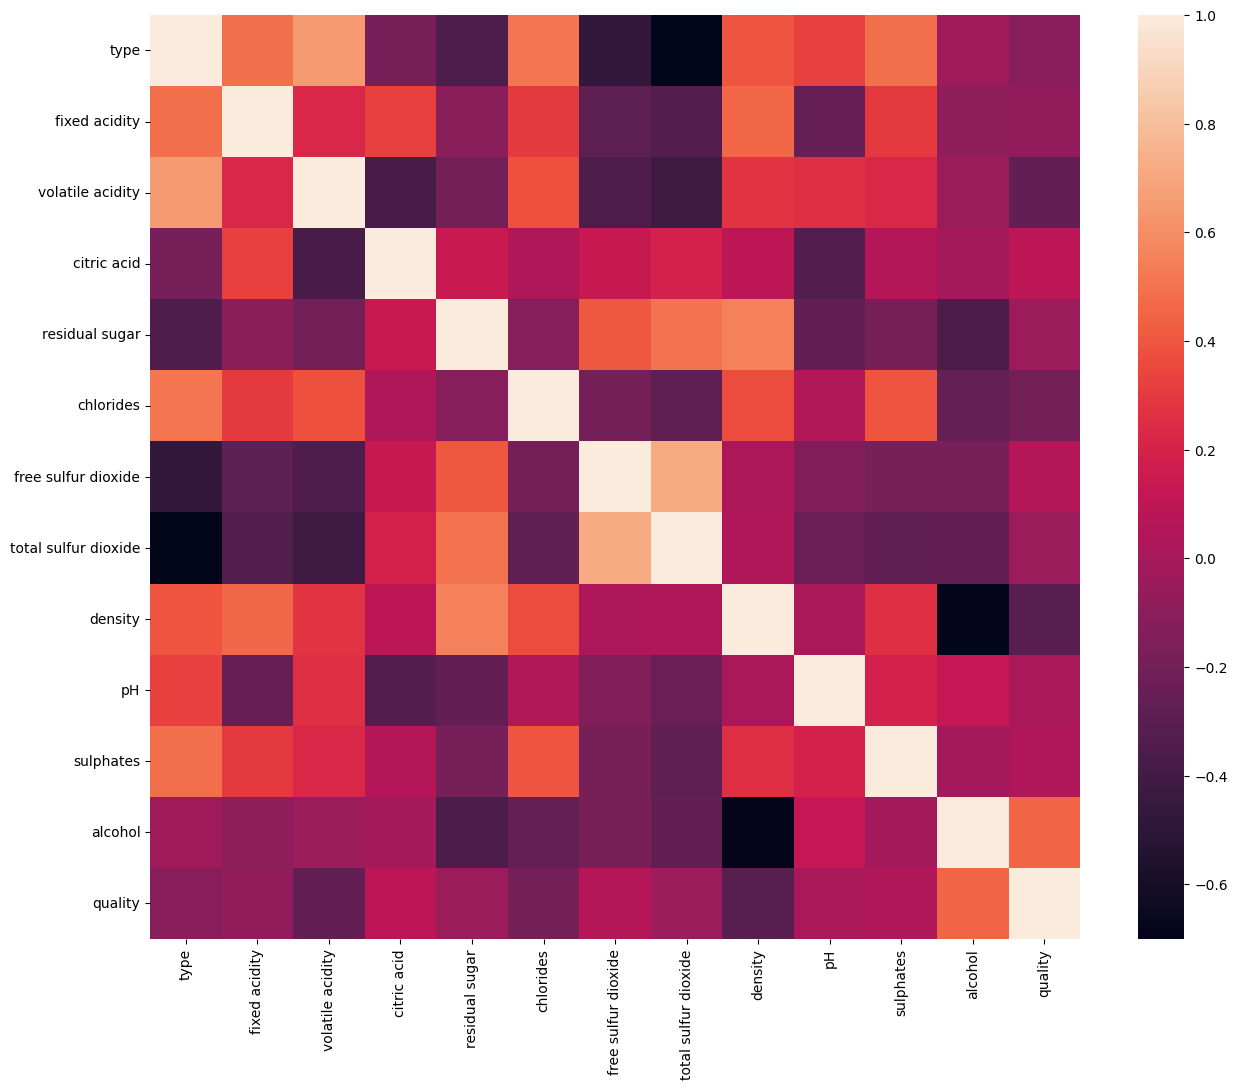

In [295]:
plt.figure(figsize=(15,12))
corr=data.corr()
sns.heatmap(corr)
plt.show()

### **Pair Plot**
---
* A pair plot is a type of visualization that shows the pairwise relationships between variables in a dataset. It is a powerful tool for exploratory data analysis (EDA), as it can help you to quickly identify patterns and relationships in your data.

* Pair plots are typically created using the pairplot() function in the Seaborn library. This function takes a DataFrame as input and creates a grid of plots, with each plot showing the relationship between two variables. The diagonal plots in the grid show the univariate distribution of each variable.

* The type of plot that is used for each bivariate relationship can be customized. By default, scatter plots are used, but other types of plots, such as histograms, can also be used.


<Figure size 1500x1200 with 0 Axes>

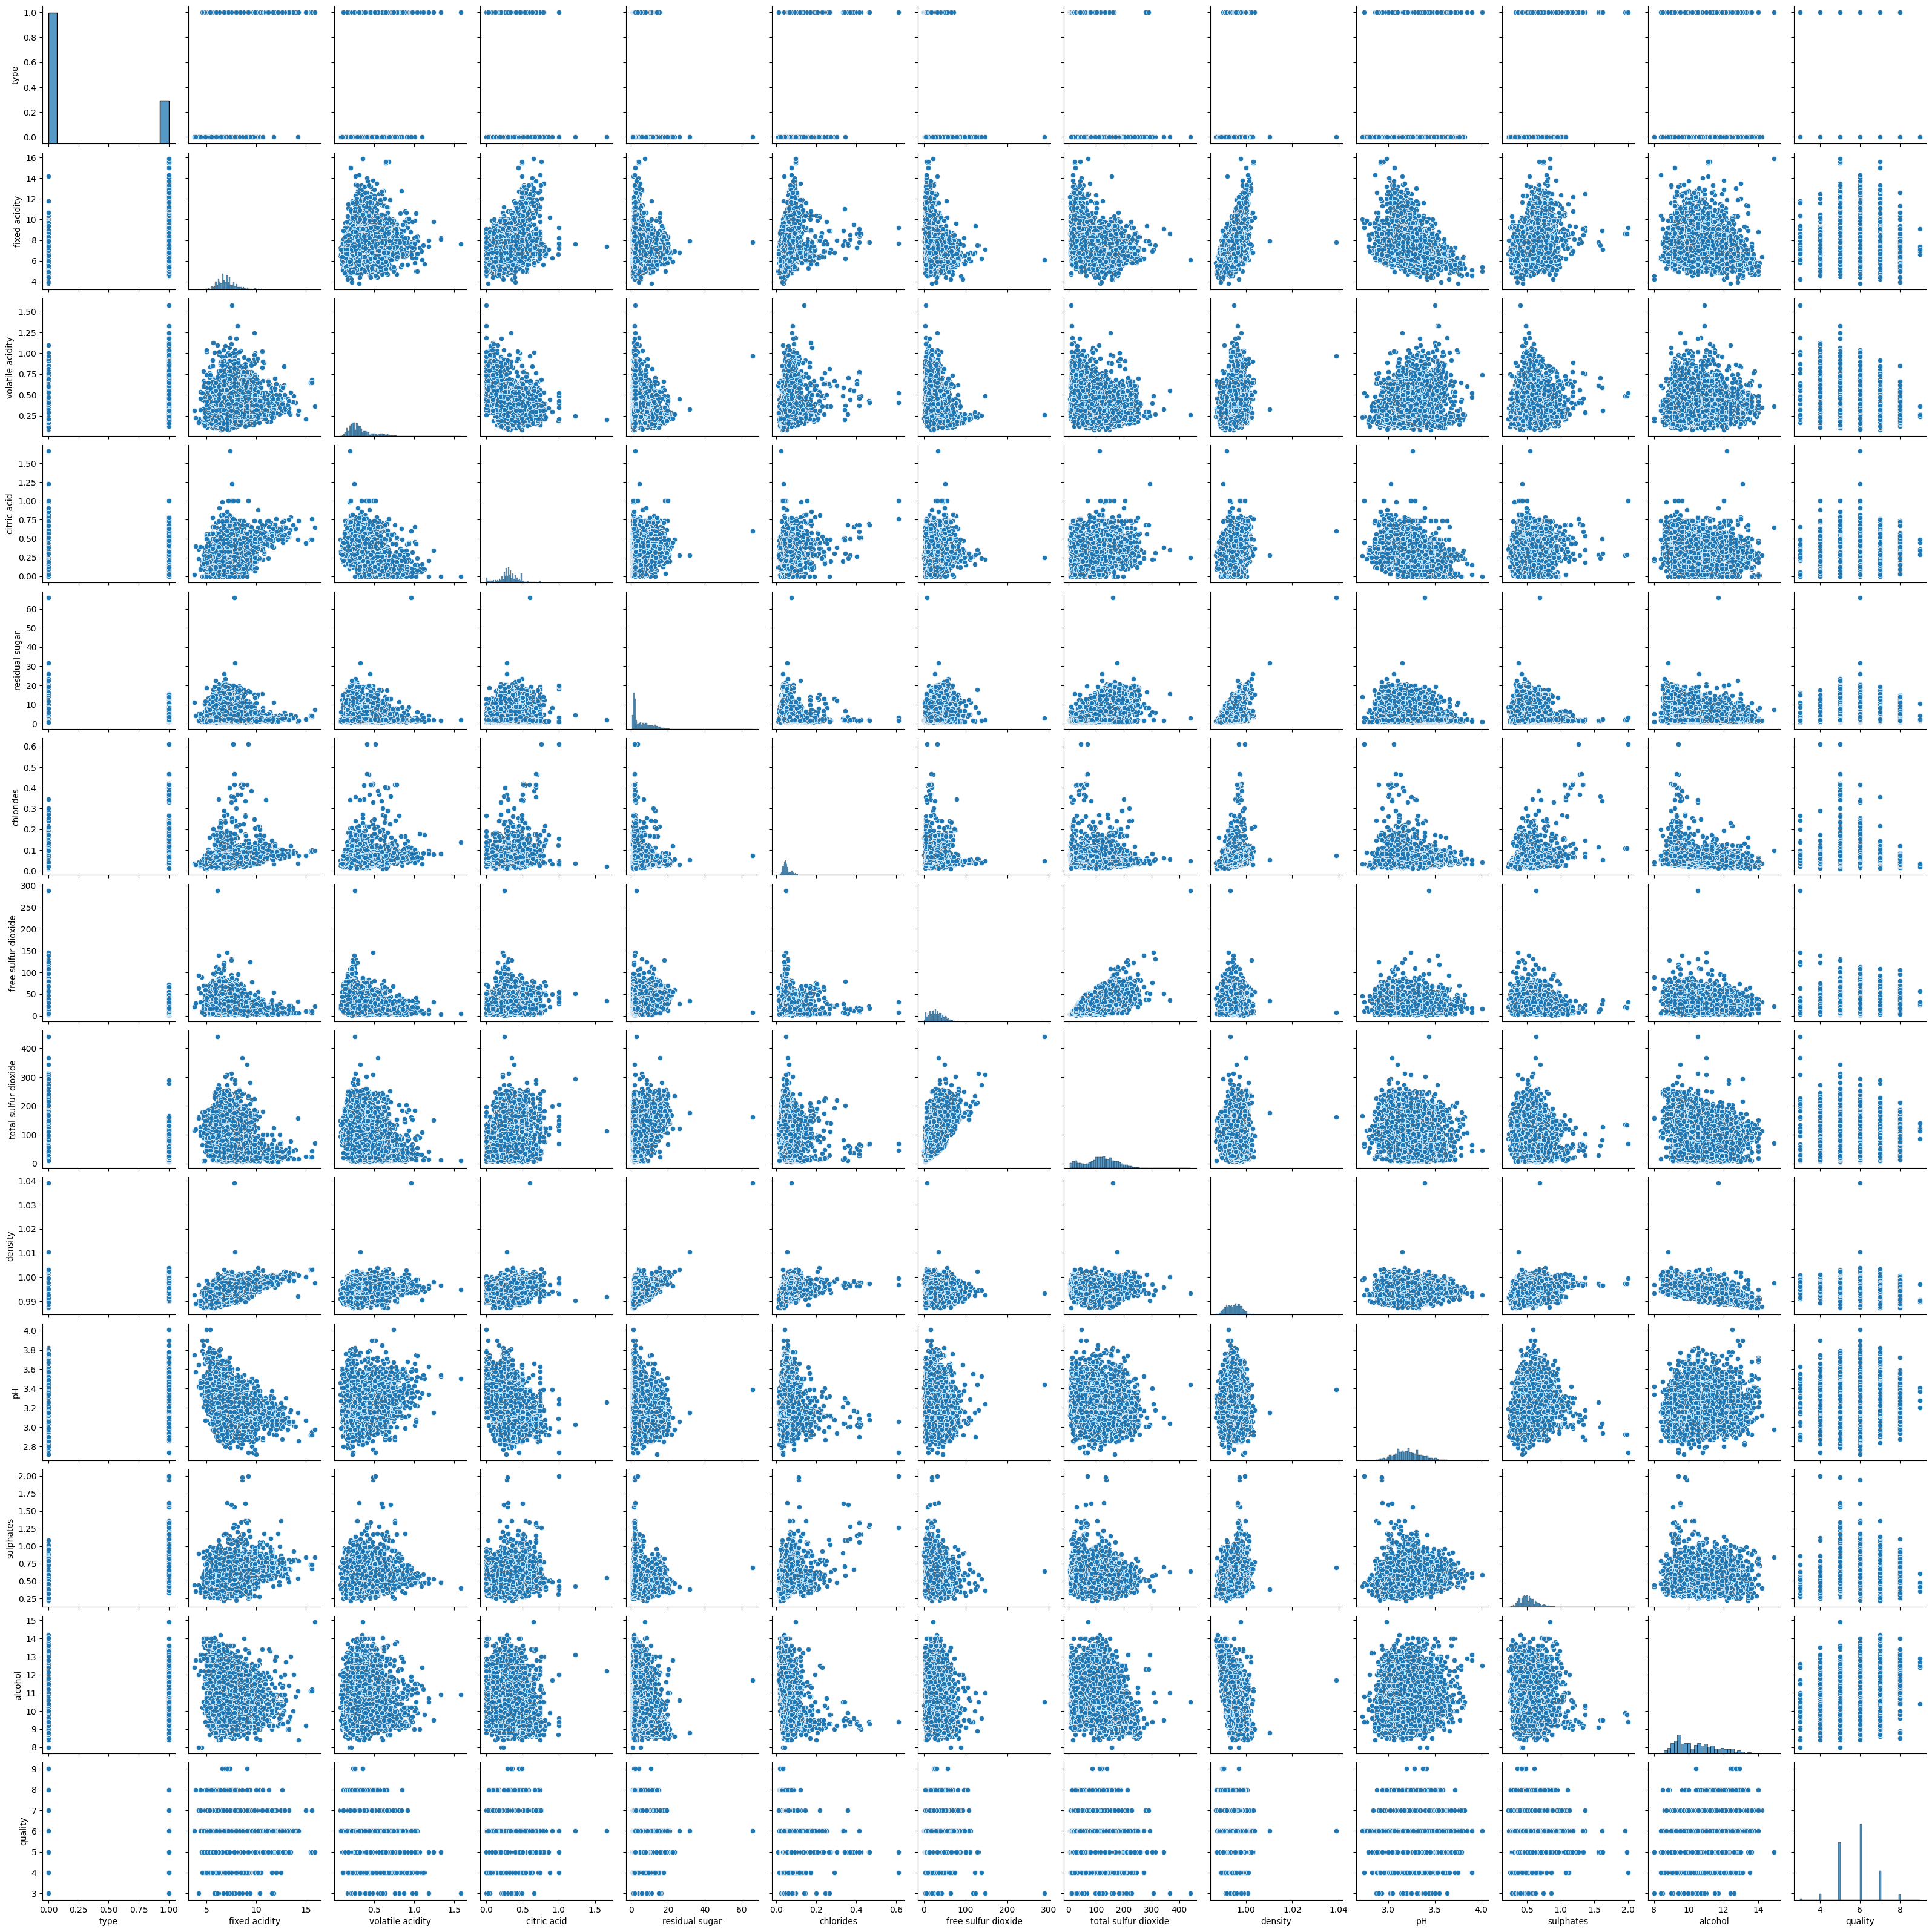

In [296]:
plt.figure(figsize=(15,12))

sns.pairplot(data)
plt.show()

### **White Wine and the Red Wine**
---
* Here, the red wine has been converted Into 1 and the white wine Into 0.
* This Is an essential step In Data Preprocessing where In teh categorical data Is converted In to numerical data.
* Here, as there are only two categories Binary digits were used.

<Axes: xlabel='type', ylabel='count'>

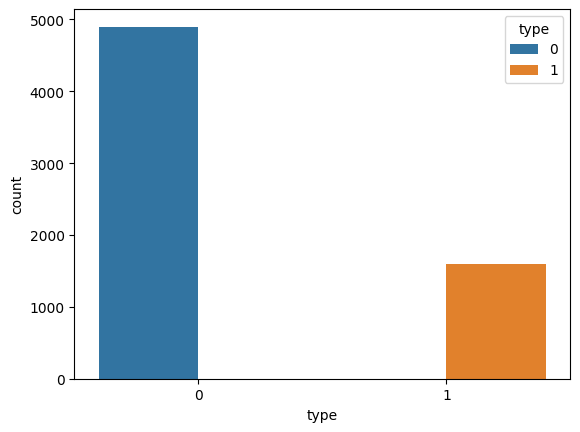

In [297]:
sns.countplot(data=data,x=data['type'],hue=data['type'])

### **Observations**
---
* The,White Wine Is produced In a larger quantity than the Red Wine.

In [298]:
px.pie(df, names='type', color='type',
             color_discrete_map={0:'lightcyan',

                                 1:'royalblue',
                                 })

### **Quality**
---
* The,Quality of the wine Is the second attribute which needs to be predicted.


In [299]:
px.pie(df, names='quality', color='quality',)

### **Observations**
---
* Here, the wine quality 6 and 5 are heavily produced.
* After, that the quantity decrease as the quality increases

## **DATA PREPROCESSING**

### **Dealing with the missing Values**
---

* Filling data with the mean is a common way to impute missing values in a dataset. The mean is the average of all the values in a column, so filling missing values with the mean will ensure that the distribution of the data is not significantly altered.

* To fill data with the mean in Python, you can use the fillna() method. The fillna() method takes a value as an argument, and it will replace all the missing values in the column with that value. For example, to fill missing values in a column with the mean of the column, you would use the following code:

In [300]:
data.fillna(data.mean(),inplace=True)
y_type=data['type']
y_quality=data['quality']
data.drop(['type','quality'],inplace=True,axis=1)

In [301]:
type_wine=y_type.to_numpy()
quality_wine=y_quality.to_numpy()

### **Standard Scaler**
---

*
StandardScaler is a statistical method that is used to normalize data. Normalization is the process of transforming data into a common scale so that different features can be compared easily.

* StandardScaler works by subtracting the mean of each feature from the data and then dividing by the standard deviation of each feature. This means that the resulting data will have a mean of 0 and a standard deviation of 1.

* StandardScaler is a popular preprocessing technique that is used in machine learning. It is often used before training a machine learning model because it can help to improve the performance of the model.

In [302]:
scaler=StandardScaler()
scaler.fit(data)
data=scaler.transform(data)
data=pd.DataFrame(data)

In [303]:
data=data.to_numpy()

###  **Train-Test-Split**
---
* Train-test split is a technique used in machine learning to evaluate the performance of a machine learning algorithm. It involves splitting the dataset into two parts: a training set and a test set. The training set is used to train the model, and the test set is used to evaluate the model's performance.

* The train-test split is important because it helps to prevent overfitting. Overfitting occurs when a model is too closely fit to the training data, and as a result, it does not generalize well to new data. The test set helps to measure how well the model generalizes to new data.

In [313]:
x_train=data[:5000,:]
x_test=data[5000:,:]

In [305]:
y_type_train=type_wine[:5000]
y_quality_train=quality_wine[:5000]
y_type_test=type_wine[5000:]
y_quality_test=quality_wine[5000:]

In [306]:
y_train={"type_wine":y_type_train,"quality_wine":y_quality_train}
y_test={"type_wine":y_type_test,"quality_wine":y_quality_test}

## **DEEP LEARNING ALGORITHM**

### **Deep Learning**
---
* Deep learning is a type of machine learning that uses artificial neural networks to learn from data. Neural networks are inspired by the human brain, and they consist of layers of interconnected nodes that process and transform data.

* Deep learning has achieved significant success in various fields, including image recognition, natural language processing, and speech recognition. It is a powerful tool that can be used to solve complex problems that were previously difficult or impossible to solve.

### **Functional API**
---
* How to Use the Keras Functional API for Deep Learning
by Jason Brownlee on October 27, 2017 in Deep Learning
Tweet Tweet  Share
Last Updated on May 28, 2020

* The Keras Python library makes creating deep learning models fast and easy.

* The sequential API allows you to create models layer-by-layer for most problems. It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.

* The functional API in Keras is an alternate way of creating models that offers a lot more flexibility, including creating more complex models.

In [307]:
input=Input(shape=(11,))
Dense1=Dense(units=512,activation='relu')(input)
Dense2=Dense(units=256,activation='relu')(Dense1)
Dense3=Dense(units=32,activation='relu')(Dense2)

Output1=Dense(units=1,activation='sigmoid',name='type_wine')(Dense3)

Output2=Dense(units=1,name='quality_wine')(Dense3)

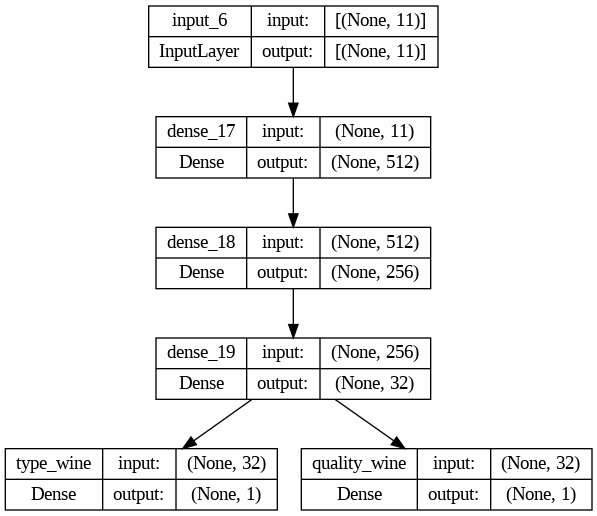

In [308]:
tf.keras.utils.plot_model(ml, show_shapes=True, show_layer_names=True)

In [309]:
ml=tf.keras.Model(inputs=input,outputs=[Output1,Output2])
ml.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 11)]         0           []                               
                                                                                                  
 dense_20 (Dense)               (None, 512)          6144        ['input_7[0][0]']                
                                                                                                  
 dense_21 (Dense)               (None, 256)          131328      ['dense_20[0][0]']               
                                                                                                  
 dense_22 (Dense)               (None, 32)           8224        ['dense_21[0][0]']               
                                                                                            

### **ADAM OPTIMIZER**
---
* Adam, which stands for Adaptive Moment Estimation, is a popular optimization algorithm used in deep learning. It is a stochastic gradient descent (SGD) method that combines the advantages of AdaGrad and RMSProp.

* Adam works by maintaining two estimates of the first and second moments of the gradients. The first moment estimate is used to calculate the learning rate, and the second moment estimate is used to adjust the learning rate based on the magnitude of the gradients.

### **Binary Cross Entropy**
---
* Binary cross entropy (also known as logarithmic loss or log loss) is a model metric that tracks incorrect labeling of the data class by a model, penalizing the model if deviations in probability occur into classifying the labels.

### **Mean Squared Error**
---
* Mean squared error (MSE) is a measure of the error between predicted values and actual values. It is calculated by taking the average of the squared differences between the predicted values and the actual values.

* MSE is a popular measure of error in regression models. It is a good measure of error because it takes into account the magnitude of the errors. For example, if a model predicts a value that is 10 units away from the actual value, this is considered to be a larger error than a model that predicts a value that is 1 unit away from the actual value.


In [310]:
ml.compile(optimizer='adam',loss={"type_wine":"binary_crossentropy","quality_wine":"mean_squared_error"}, metrics = {'type_wine' : 'accuracy',
                         'quality_wine': tf.keras.metrics.RootMeanSquaredError()
                       })

ml.fit(x=x_train,y=y,epochs=100,shuffle=True,validation_split=0.2)

Epoch 1/100
125/125 [==============================] - 3s 7ms/step - loss: 3.3496 - type_wine_loss: 0.1594 - quality_wine_loss: 3.1902 - type_wine_accuracy: 0.9380 - quality_wine_root_mean_squared_error: 1.7861 - val_loss: 1.8268 - val_type_wine_loss: 0.3079 - val_quality_wine_loss: 1.5188 - val_type_wine_accuracy: 0.8980 - val_quality_wine_root_mean_squared_error: 1.2324
Epoch 2/100
125/125 [==============================] - 1s 5ms/step - loss: 0.9489 - type_wine_loss: 0.0145 - quality_wine_loss: 0.9344 - type_wine_accuracy: 1.0000 - quality_wine_root_mean_squared_error: 0.9666 - val_loss: 1.3671 - val_type_wine_loss: 0.3772 - val_quality_wine_loss: 0.9899 - val_type_wine_accuracy: 0.8980 - val_quality_wine_root_mean_squared_error: 0.9949
Epoch 3/100
125/125 [==============================] - 1s 5ms/step - loss: 0.6599 - type_wine_loss: 0.0069 - quality_wine_loss: 0.6529 - type_wine_accuracy: 1.0000 - quality_wine_root_mean_squared_error: 0.8080 - val_loss: 1.2101 - val_type_wine_loss

## **ML METRICS**

### **Evaluation**
---
* Metrics are important in machine learning because they provide a way to measure the performance of a model. This is important because it allows us to compare different models and to see how a model is performing over time.

* The choice of metric depends on the specific problem that is being solved. For example, if the goal is to classify images, then accuracy is a good metric to use. However, if the goal is to predict the price of a house, then RMSE or MAE may be a better metric to use.

* Metrics are an essential part of machine learning because they allow us to measure the performance of our models and to make informed decisions about how to improve them.

In [311]:
z=ml.predict(x_test)

157/157 [==============================] - 0s 2ms/step


In [314]:
loss, wine_quality_loss, wine_type_loss, wine_quality_rmse, wine_type_accuracy = ml.evaluate(x=x_test, y=y_test)

print()
print(f'loss: {loss}')
print(f'wine_quality_loss: {wine_quality_loss}')
print(f'wine_type_loss: {wine_type_loss}')
print(f'wine_quality_rmse: {wine_quality_rmse}')
print(f'wine_type_accuracy: {wine_type_accuracy}')

47/47 [==============================] - 0s 4ms/step - loss: 12.0871 - type_wine_loss: 9.4529 - quality_wine_loss: 2.6342 - type_wine_accuracy: 0.0000e+00 - quality_wine_root_mean_squared_error: 1.6230

loss: 12.087124824523926
wine_quality_loss: 9.452898979187012
wine_type_loss: 2.6342248916625977
wine_quality_rmse: 0.0
wine_type_accuracy: 1.6230294704437256
